In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import numpy as np
import os


In [ ]:
dataset_path = '/content/drive/MyDrive/animals'


In [ ]:
pip install split-folders


In [ ]:
import splitfolders

splitfolders.ratio(dataset_path, output="output_folder", seed=42, ratio=(0.8, 0.2), group_prefix=None)


Copying files: 3707 files [20:12,  3.06 files/s]


In [ ]:
train_dir = '/content/output_folder/train'
val_dir = '/content/output_folder/val'


In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values between 0 and 1
    rotation_range=20,          # Rotate images randomly
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    horizontal_flip=True        # Flip images horizontally
)

# Data preprocessing for validation
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate batches of tensor image data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)


Found 2943 images belonging to 92 classes.
Found 764 images belonging to 92 classes.


In [ ]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 92)                  │          23,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,338,204 (69.95 MB)

 Trainable params: 16,080,220 (61.34 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.1820 - loss: 9.9956 - val_accuracy: 0.6034 - val_loss: 1.7219
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.6409 - loss: 1.4582 - val_accuracy: 0.7330 - val_loss: 1.2951
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.7502 - loss: 1.0167 - val_accuracy: 0.7395 - val_loss: 1.3348
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.7737 - loss: 0.9017 - val_accuracy: 0.7552 - val_loss: 1.3980
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.7895 - loss: 0.8082 - val_accuracy: 0.7932 - val_loss: 1.3286
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.8515 - loss: 0.5956 - val_accuracy: 0.7814 - val_loss: 1.2475
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8613 - loss: 0.5260 - val_accuracy: 0.7814 - val_loss: 1.3076
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.8742 - loss: 0.4645 - val_accuracy: 0.7866 - val_loss: 1.

In [ ]:
model.save('animal_classifier_model.h5')


In [ ]:
base_model.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#fine-tuning
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)

model.save('fine_tuned_animal_classifier_model.h5')


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 855s 9s/step - accuracy: 0.7987 - loss: 0.8160 - val_accuracy: 0.8128 - val_loss: 1.4448
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 853s 9s/step - accuracy: 0.8833 - loss: 0.4018 - val_accuracy: 0.8259 - val_loss: 1.5568
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 854s 9s/step - accuracy: 0.9162 - loss: 0.2864 - val_accuracy: 0.8194 - val_loss: 1.6329
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 823s 9s/step - accuracy: 0.9291 - loss: 0.2157 - val_accuracy: 0.8050 - val_loss: 1.8282
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 812s 9s/step - accuracy: 0.9350 - loss: 0.2202 - val_accuracy: 0.8168 - val_loss: 1.7362


In [ ]:
model = load_model('fine_tuned_animal_classifier_model.h5')

def predict_image(image_path):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    print(f"Predicted Class: {predicted_label}")
    return predicted_label

test_image_path = '/content/output_folder/train/bear/8cf44a21ba.jpg'
predict_image(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: bear


'bear'

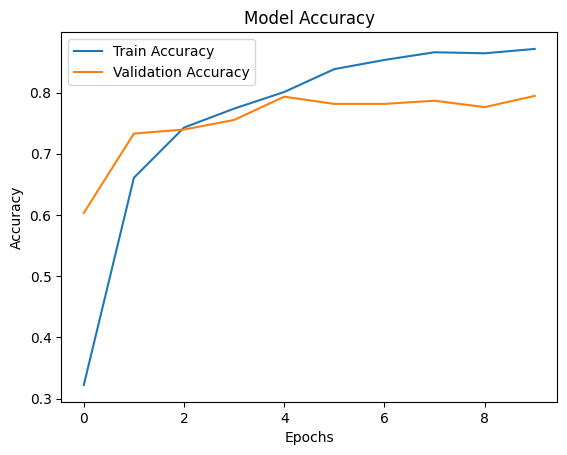

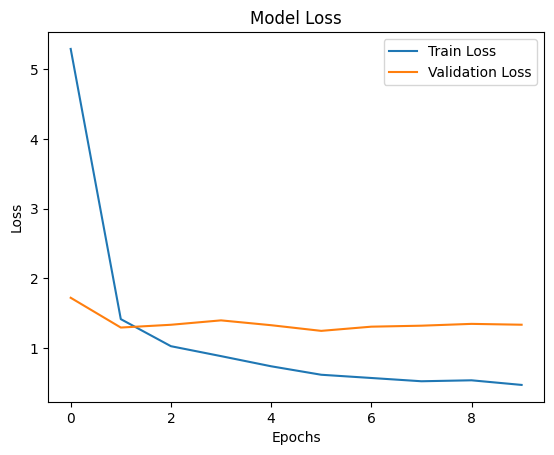

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from io import BytesIO
from PIL import Image
from IPython.display import display, Image as IPImage
from ipywidgets import FileUpload, Dropdown, VBox, Output, Button
from tensorflow.keras.models import load_model

model = load_model('fine_tuned_animal_classifier_model.h5')

class_labels = ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly',
                'cat', 'caterpillar', 'cheetah', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab',
                'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant',
                'flamingo', 'fox', 'fly', 'goose', 'grasshopper', 'hare', 'hedgehog', 'goat', 'goldfish',
                'gorilla', 'hamster', 'hornbill', 'hyena', 'jaguar', 'jellyfish', 'ladybug', 'mosquito',
                'moth', 'hippopotamus', 'horse', 'hummingbird', 'kangaroo', 'koala', 'leopard', 'lion',
                'lizard', 'lobster', 'okapi', 'orangutan', 'otter', 'ox', 'oyster', 'pelecaniformes',
                'pig', 'mouse', 'octopus', 'owl', 'panda', 'parrot', 'penguin', 'pigeon', 'porcupine',
                'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal',
                'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger',
                'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


upload_widget = FileUpload(accept='image/*', multiple=False)
label_dropdown = Dropdown(options=class_labels, description='True Label:', value=None)
output = Output()
submit_button = Button(description="Submit", button_style="primary")

display(VBox([upload_widget, label_dropdown, submit_button, output]))

# Function to predict the uploaded image and compare with true label
def predict_uploaded_image(image_data, true_label):
    with output:
        output.clear_output()

        img = Image.open(BytesIO(image_data))
        img = img.resize((224, 224))
        display(IPImage(data=image_data))

        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        predicted_label = class_labels[predicted_class]

        is_correct = predicted_label == true_label

        print(f"Predicted Class: {predicted_label}")
        print(f"True Label: {true_label}")
        print(f"Prediction Correct: {'Yes' if is_correct else 'No'}")
        print(f"Confidence Score: {predictions[0][predicted_class] * 100:.2f}%")


def on_submit_click(change):
    if upload_widget.value:
        uploaded_file = next(iter(upload_widget.value.values()))
        image_data = uploaded_file['content']
        true_label = label_dropdown.value

        if true_label:
            predict_uploaded_image(image_data, true_label)
        else:
            with output:
                output.clear_output()
                print("Please select a true label.")
    else:
        with output:
            output.clear_output()
            print("Please upload an image.")

submit_button.on_click(on_submit_click)
